Import the necessary libraries

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Import the necessary data frames

In [159]:
cab= pd.read_csv(r'E:\2020\PERSONAL\Data Glacier\Week 2 Cab EDA\DataSets-main\Cab_Data.csv')
city=pd.read_csv(r'E:\2020\PERSONAL\Data Glacier\Week 2 Cab EDA\DataSets-main\City.csv')
customer= pd.read_csv(r'E:\2020\PERSONAL\Data Glacier\Week 2 Cab EDA\DataSets-main\Customer_ID.csv')
transaction =pd.read_csv(r'E:\2020\PERSONAL\Data Glacier\Week 2 Cab EDA\DataSets-main\Transaction_ID.csv')

In [160]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.63
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.60
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.78


In [161]:
city.head()

,City,Population,Users
0,NEW YORK NY,8405837.0,302149.0
1,CHICAGO IL,1955130.0,164468.0
2,LOS ANGELES CA,1595037.0,144132.0
3,MIAMI FL,1339155.0,17675.0
4,SILICON VALLEY,1177609.0,27247.0


In [162]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28.0,10813.0
1,27703,Male,27.0,9237.0
2,28712,Male,53.0,11242.0
3,28020,Male,23.0,23327.0
4,27182,Male,33.0,8536.0


In [163]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290.0,Card
1,10000012,27703.0,Card
2,10000013,28712.0,Cash
3,10000014,28020.0,Cash
4,10000015,27182.0,Card


In [164]:
#Get the number of rows, columns for each dataset
print ("cab",cab.shape)
print ("transaction",transaction.shape)
print ("customer",customer.shape)


cab (359392, 7)
transaction (440098, 3)
customer (49171, 4)


In [165]:
#Exploration on data relationships:Correlation
#Table below shows a high correlation between the 'price charged' and the 'cost of the trip' and 'KM travelled'
cab_corr=cab.corr()
cab_corr

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462
KM Travelled,-0.001429,1.000000,0.835753,0.981848
Price Charged,-0.052902,0.835753,1.000000,0.859812
Cost of Trip,-0.003462,0.981848,0.859812,1.000000


The next cell visualizes the heatmap for all the variablesin the data set.
From the scale on the right,color red os at 0 meaning it represents weak correlation.
color blue is at 1 meaning it represents strong correlation. 
therefore we can see a strong correlation between Price charged and the KM travelled and the cost of the trip.

<AxesSubplot:>

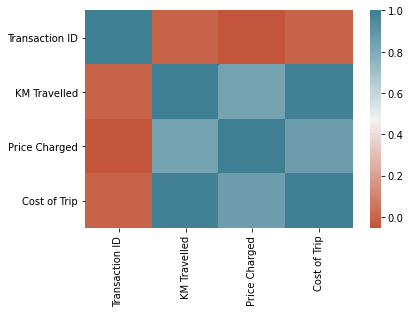

In [166]:
#Visualize the correlation matrix using a heatmap
cab_hm= sns.heatmap(cab_corr
                   ,cmap=sns.diverging_palette(20, 220, n=200))
cab_hm

The next cell will be merging two data sets;Transaction_ID and Cab_Data. the process will be carried out with a full outer merge because the two datasets have a common column:'Transaction ID'.A full outer merge combines both tables without losing any columns.

In [167]:
new=pd.merge(cab, transaction)
new.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,29290.0,Card
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,27703.0,Card
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.63,28712.0,Cash
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.60,28020.0,Cash
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.78,27182.0,Card


In [168]:
new.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
359387,10440101,1/8/2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,52392.0,Cash
359388,10440104,1/4/2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,53286.0,Cash
359389,10440105,1/5/2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,52265.0,Cash
359390,10440106,1/5/2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,52175.0,Card
359391,10440107,1/2/2018,Yellow Cab,WASHINGTON DC,12.76,191.58,177.62,52917.0,Card


We find correlationof the merged dataset

In [169]:
new.corr(method='spearman')

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID
Transaction ID,1.000000,-0.001470,-0.040401,-0.003537,-0.020391
KM Travelled,-0.001470,1.000000,0.892958,0.984546,0.000428
Price Charged,-0.040401,0.892958,1.000000,0.913581,-0.204821
Cost of Trip,-0.003537,0.984546,0.913581,1.000000,-0.009639
Customer ID,-0.020391,0.000428,-0.204821,-0.009639,1.000000


In [170]:
customer.corr(method='pearson')


,Customer ID,Age,Income (USD/Month)
Customer ID,1.000000,-0.006749,-0.006911
Age,-0.006749,1.000000,0.000156
Income (USD/Month),-0.006911,0.000156,1.000000


In [171]:
customer.corr(method='spearman')

,Customer ID,Age,Income (USD/Month)
Customer ID,1.000000,-0.004956,-0.007843
Age,-0.004956,1.000000,0.000552
Income (USD/Month),-0.007843,0.000552,1.000000


Search for and remove null variables

In [172]:
nulls=new.isnull()
nulls

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
359387,False,False,False,False,False,False,False,False,False
359388,False,False,False,False,False,False,False,False,False
359389,False,False,False,False,False,False,False,False,False
359390,False,False,False,False,False,False,False,False,False


In [173]:

new.dropna()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,29290.0,Card
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,27703.0,Card
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.63,28712.0,Cash
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.60,28020.0,Cash
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.78,27182.0,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,1/8/2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,52392.0,Cash
359388,10440104,1/4/2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,53286.0,Cash
359389,10440105,1/5/2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,52265.0,Cash
359390,10440106,1/5/2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,52175.0,Card


In [174]:
new.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190185,19191.652115
std,1.268058e+05,12.233526,274.378911,157.993645,21012.412463
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000
75%,1.033094e+07,32.960000,583.660000,413.680000,36078.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000


Add a new column 'profit' to represent the profit made per trip

In [238]:
new['profit']= new['Price Charged']-new['Cost of Trip']
new.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.64,29290.0,Card,57.31
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85,27703.0,Card,23.67
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63,28712.0,Cash,27.57
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.60,28020.0,Cash,25.80
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.78,27182.0,Card,16.84


In [237]:
new.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,profit
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,52392.0,Cash,5.88
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,53286.0,Cash,6.90
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,52265.0,Cash,87.42
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,52175.0,Card,32.14
359391,10440107,2018-01-02,Yellow Cab,WASHINGTON DC,12.76,191.58,177.62,52917.0,Card,13.96


In [177]:
Pink_cab_profit=new.query("Company == 'Pink Cab'")['profit'].sum()   
Pink_cab_profit


5307302.97

In [180]:
Yellow_cab_profit= new.query("Company == 'Yellow Cab'")['profit'].sum()
Yellow_cab_profit

44020372.589999996

In [181]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.63
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.60
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.78


In [182]:
print(cab.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB
None


In [183]:
print(cab.shape)

(359392, 7)


In [184]:
print(cab.columns)

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')


In [185]:
cab.loc[100]

Transaction ID          10000111
Date of Travel          1/5/2016
Company                 Pink Cab
City              LOS ANGELES CA
KM Travelled               34.68
Price Charged             720.24
Cost of Trip              398.82
Name: 100, dtype: object

In [186]:
Date_of_Travel=cab.loc[:,'Date of Travel']
Date_of_Travel.head(10)

0     1/8/2016
1     1/6/2016
2     1/2/2016
3     1/7/2016
4     1/3/2016
5     1/7/2016
6     1/3/2016
7     1/7/2016
8    1/12/2016
9     1/6/2016
Name: Date of Travel, dtype: object

In [214]:
cost=new.groupby(['Date of Travel'])['Cost of Trip'].sum()
cost = new.set_index(new['Date of Travel'].rename('year').dt.year,append=True).swaplevel(0,1)
print(cost)

             Transaction ID Date of Travel     Company           City  \
year                                                                    
2016 0             10000011     2016-01-08    Pink Cab     ATLANTA GA   
     1             10000012     2016-01-06    Pink Cab     ATLANTA GA   
     2             10000013     2016-01-02    Pink Cab     ATLANTA GA   
     3             10000014     2016-01-07    Pink Cab     ATLANTA GA   
     4             10000015     2016-01-03    Pink Cab     ATLANTA GA   
...                     ...            ...         ...            ...   
2018 359387        10440101     2018-01-08  Yellow Cab  WASHINGTON DC   
     359388        10440104     2018-01-04  Yellow Cab  WASHINGTON DC   
     359389        10440105     2018-01-05  Yellow Cab  WASHINGTON DC   
     359390        10440106     2018-01-05  Yellow Cab  WASHINGTON DC   
     359391        10440107     2018-01-02  Yellow Cab  WASHINGTON DC   

             KM Travelled  Price Charged  Cost of 

In [215]:
cost.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
year                                                                        
2016 0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
     1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
     2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
     3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
     4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

        Price Charged  Cost of Trip  Customer ID Payment_Mode  profit  
year                                                                   
2016 0         370.95        313.64      29290.0         Card   57.31  
     1         358.52        334.85      27703.0         Card   23.67  
     2         125.20         97.63      28712.0         Cash   27.57  
     3         377.40        351.60      28020.0         Cash   25.80  
     4         114.62         97.78      27182.0         Card   16.84

In [190]:
cab['profit1']= cab['Price Charged']-cab['Cost of Trip']
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit1
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,57.31
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,23.67
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.63,27.57
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.60,25.80
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.78,16.84


In [191]:
rev=cab.groupby(['Company'])[['profit1','Cost of Trip']].sum()
rev

,profit1,Cost of Trip
Company,,
Pink Cab,5307302.97,2.102095e+07
Yellow Cab,44020372.59,8.183351e+07


In [204]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Pink Cab to Yellow Cab
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   profit1       2 non-null      float64
 1   Cost of Trip  2 non-null      float64
dtypes: float64(2)
memory usage: 48.0+ bytes


<AxesSubplot:xlabel='Company'>

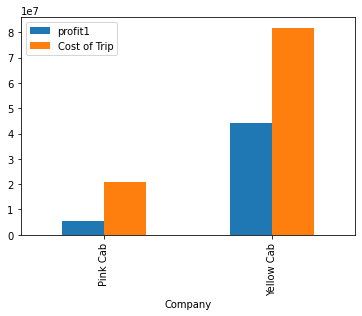

In [203]:
rev.plot(kind="bar")

In [205]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28.0,10813.0
1,27703,Male,27.0,9237.0
2,28712,Male,53.0,11242.0
3,28020,Male,23.0,23327.0
4,27182,Male,33.0,8536.0


In [222]:
Income_by_age=customer.groupby(['Age'])[['Income (USD/Month)']].sum()
Income_by_age.head()


,Income (USD/Month)
Age,
18.0,22845795.0
19.0,23365404.0
20.0,24789344.0
21.0,23359891.0
22.0,24304927.0


<AxesSubplot:xlabel='Age'>

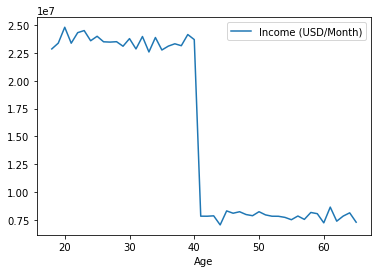

In [223]:
Income_by_age.plot()

In [226]:
Income_by_gender= customer.groupby(['Gender'])[['Income (USD/Month)']].sum()
Income_by_gender.head()

,Income (USD/Month)
Gender,
Female,338820025.0
Male,399513609.0


<AxesSubplot:xlabel='Gender'>

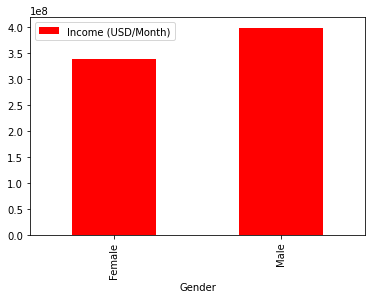

In [228]:
Income_by_gender.plot(kind="bar",color='red')

<AxesSubplot:>

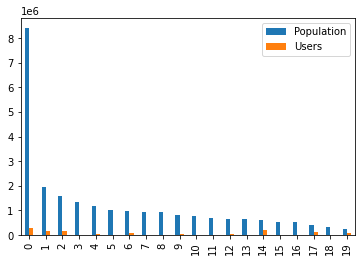

In [229]:
city.plot(kind='bar')

<AxesSubplot:xlabel='City'>

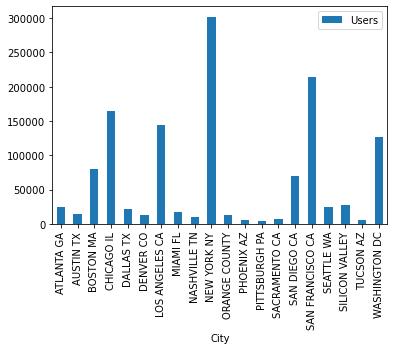

In [231]:
city_users.plot(kind="bar")

In [102]:

distance_cost=cab.groupby(['Date of Travel','Company'])[['Price Charged','Cost of Trip']].sum()
distance_cost.head()

Price Charged  Cost of Trip
Date of Travel Company                                
1/1/2017       Pink Cab         77789.81      51418.46
               Yellow Cab      352496.64     205605.43
1/1/2018       Pink Cab         29896.74      22079.62
               Yellow Cab      116500.46      81320.27
1/10/2016      Pink Cab         22972.56      15860.14

In [81]:
cab.dtypes

Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [230]:
city_users=city.groupby(['City'])[['Users']].sum()
city_users

,Users
City,
ATLANTA GA,24701.0
AUSTIN TX,14978.0
BOSTON MA,80021.0
CHICAGO IL,164468.0
DALLAS TX,22157.0
DENVER CO,12421.0
LOS ANGELES CA,144132.0
MIAMI FL,17675.0
NASHVILLE TN,9270.0


In [92]:
pd.to_numeric(city['Population'])

0     8405837.0
1     1955130.0
2     1595037.0
3     1339155.0
4     1177609.0
5     1030185.0
6      959307.0
7      943999.0
8      942908.0
9      814885.0
10     754233.0
11     698371.0
12     671238.0
13     631442.0
14     629591.0
15     545776.0
16     542085.0
17     418859.0
18     327225.0
19     248968.0
Name: Population, dtype: float64